<a href="https://colab.research.google.com/github/yvkrishna/Vidyut-Rakshak/blob/master/Kerala_Reboot_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf
import csv
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [219]:
df = pd.read_csv("DummyDataset.csv")
dfv = pd.read_csv("validation.csv")

In [220]:
output_classes = df.pop('Target')
output_classes_v = dfv.pop('Target')

In [221]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, output_classes.values)).batch(2)
dataset_v = tf.data.Dataset.from_tensor_slices((dfv.values, output_classes_v.values)).batch(2)

In [222]:
# for feat, targ in dataset_v.take(5):
#   print ('Features: {}, Target: {}'.format(feat, targ))

In [223]:
# train_dataset = dataset.shuffle(len(df)).batch(1)

In [224]:
def get_compiled_model():
  model = tf.keras.Sequential([tf.keras.layers.Dense(5, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
                              ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])
  return model

In [225]:
model = get_compiled_model()
history = model.fit(dataset, epochs=20,shuffle=True)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

500/500 [==============================] - 0s 841us/step - loss: 2.2952 - accuracy: 0.9190
Epoch 2/20
500/500 [==============================] - 0s 866us/step - loss: 0.7492 - accuracy: 0.9390
Epoch 3/20
500/500 [==============================] - 0s 857us/step - loss: 0.7174 - accuracy: 0.9390
Epoch 4/20
500/500 [==============================] - 0s 783us/step - loss: 0.7408 - accuracy: 0.9380
Epoch 5/20
500/500 [==============================] - 0s 798us/step - loss: 0.7518 - accuracy: 0.937

In [226]:
test_loss, test_accuracy = model.evaluate(
                              dataset_v
                          )

500/500 [==============================] - 0s 721us/step - loss: 11.7002 - accuracy: 0.5000


In [227]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [228]:
model.predict([[230,19]])

array([[1.]], dtype=float32)

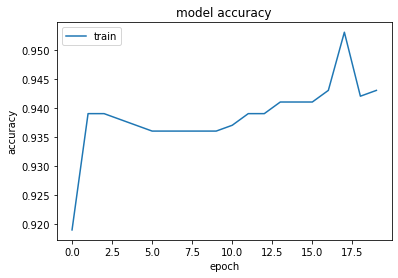

In [229]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [230]:
def get_rnn_compiled_model():
  model = tf.keras.Sequential()
  model.add(layers.SimpleRNN(50))
  model.add(layers.Dense(5,activation="relu"))
  model.add(layers.Dense(1, activation="sigmoid"))
  model.compile(optimizer='adam',
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [217]:
model.fit(
   dataset, epochs=10,shuffle=True , validation_data=dataset_v
)

Epoch 1/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4760 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4780 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 3/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4780 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 4/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4780 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 5/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4780 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 6/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4780 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 7/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4780 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 

In [218]:
model.predict([[230,27]])

array([[0.5290498]], dtype=float32)

In [231]:
model.predict([[220,15]])

array([[1.]], dtype=float32)

In [232]:
model.predict([[200,12]])

array([[1.]], dtype=float32)